Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [5]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [6]:
##

### 5. How many rows and columns are in gdp_df? 
### What are the data types of each column?

In [8]:
gdp_df.shape
print(gdp_df['Country or Area'].dtypes)
print(gdp_df['Year'].dtypes)
print(gdp_df['Value'].dtypes)
print(gdp_df['Value Footnotes'].dtypes)

object
int64
float64
float64


In [9]:
##

In [10]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


### 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [13]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [14]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [16]:
year_count_df = gdp_df.groupby(['Country'])['Year'].count().sort_values().reset_index()

In [17]:
year_count_df

,Country,Year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [18]:
#gdp[gdp_df['Country']=='Afghanistan'] filter function
#gdp[gdp_df['Country']=='Afghanistan']['Year'].count() for count of years in dataframe
gdp_df['Year'].nunique() #for count

33

In [19]:
gdp_df['Year'].unique #for list

<bound method Series.unique of 0       2021
1       2020
2       2019
3       2018
4       2017
        ... 
7657    1994
7658    1993
7659    1992
7660    1991
7661    1990
Name: Year, Length: 7662, dtype: int64>

In [20]:
year_count_df[year_count_df['Year']<33]

,Country,Year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
5,Cayman Islands,16
6,Nauru,19
7,Afghanistan,20
8,CuraÃ§ao,22
9,Palau,22


In [21]:
year_count_df[year_count_df['Year']<33].count()

Country    40
Year       40
dtype: int64

In [22]:
year_count_df[year_count_df['Year']==33]

,Country,Year
40,Papua New Guinea,33
41,Pakistan,33
42,Australia,33
43,Pacific island small states,33
44,Austria,33
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [23]:
year_count_df[year_count_df['Year']==33].count()

Country    202
Year       202
dtype: int64

In [24]:
#It looks like 1/6 of the countries of the world did not start recording GDP/were active until the 90's or later.

In [25]:
#Ryan Approach: 
gdp_years = gdp_df.groupby("Country")
gdp_last = gdp_years.last()
gdp_min = gdp_last.sort_values(by="Year",ascending=False)
# All countries' first appearance in the dataset
gdp_min[gdp_min["Year"]>1990]
# All countries' whose first appearance was after 1990

,Year,GDP_Per_Capita
Country,,
Somalia,2013,889.166677
Djibouti,2013,3664.268036
Turks and Caicos Islands,2011,25731.283253
Sint Maarten (Dutch part),2009,41969.404381
Kosovo,2008,7032.452297
Cayman Islands,2006,84778.384261
Nauru,2004,5342.330551
Afghanistan,2002,1280.463171
SÃ£o TomÃ© and Principe,2001,2558.983512


In [26]:
gdp_countries = gdp_df.groupby("Year")
gdp_observations = gdp_countries["Country"].count()
print(gdp_observations.to_string()) # Number of countries per year

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232


### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

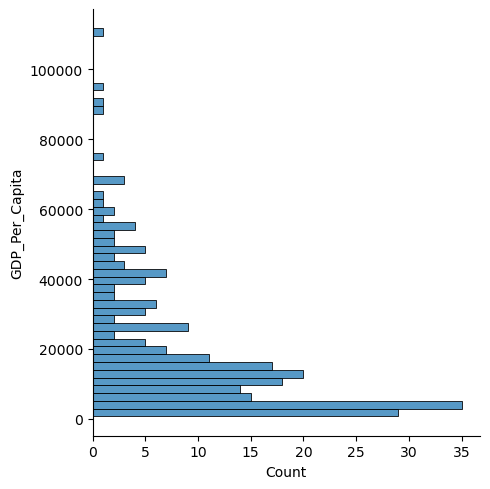

In [28]:
filtered_gdp = gdp_df[gdp_df['Year']==2020]
filtered_gdp
sns.displot( data=filtered_gdp, y='GDP_Per_Capita', bins = 50)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

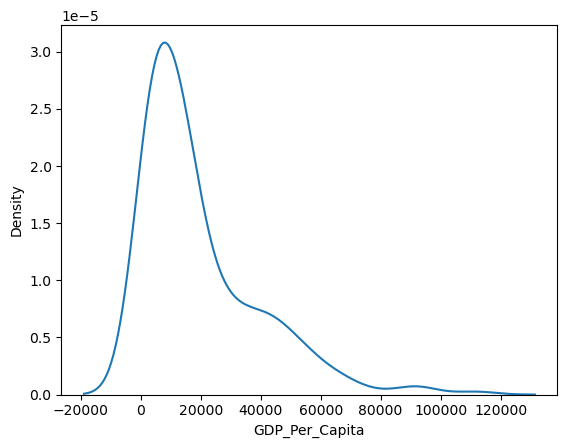

In [29]:
sns.kdeplot(filtered_gdp['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

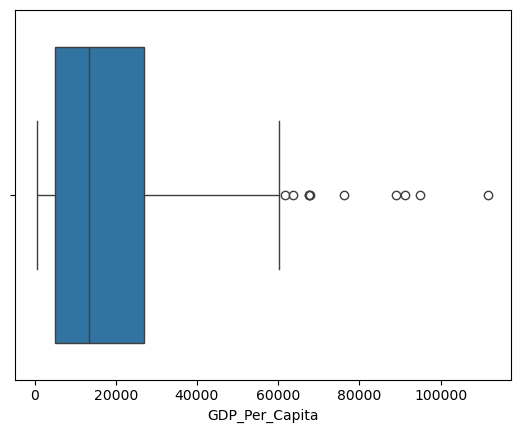

In [30]:
sns.boxplot(x="GDP_Per_Capita", data=filtered_gdp )

<Axes: ylabel='GDP_Per_Capita'>

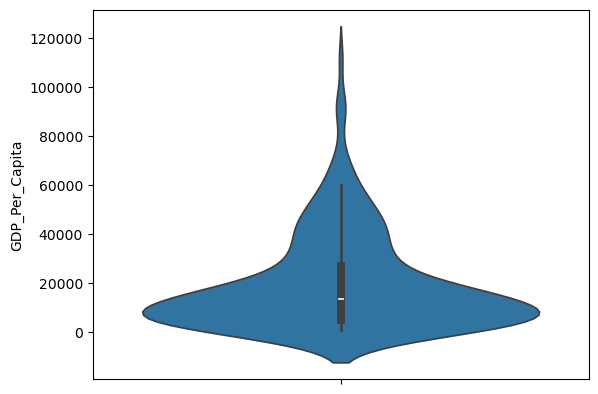

In [31]:
sns.violinplot(y="GDP_Per_Capita", data=filtered_gdp)

### 9.What was the median GDP per capita value in 2020?

In [33]:
filtered_gdp['GDP_Per_Capita'].median()

13357.997573370474

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [35]:
gdp_decades = (1990,2000,2010,2020)
q10 = gdp_df[gdp_df['Year'].isin(gdp_decades)]
q10

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


### A boxplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

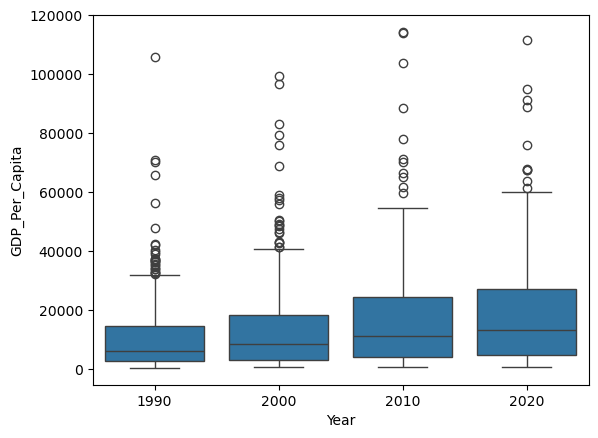

In [37]:
sns.boxplot(x="Year", y="GDP_Per_Capita", data=q10)

### A barplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

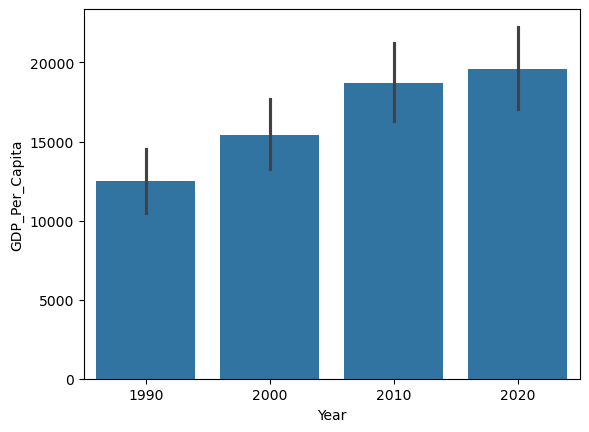

In [39]:
sns.barplot(x=q10.Year, y=q10.GDP_Per_Capita)

### A scatterplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

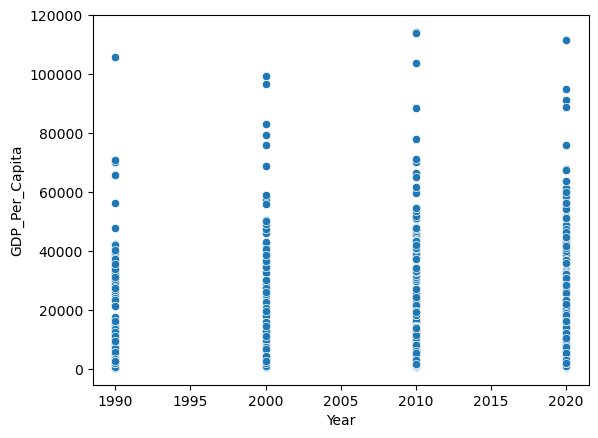

In [41]:
sns.scatterplot(y=q10["GDP_Per_Capita"], x=q10["Year"] )

### A scatterplot with a trend line overlaid

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

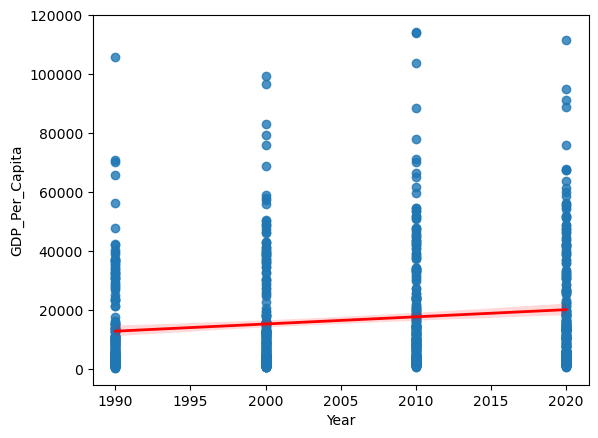

In [43]:
sns.regplot(y=q10["GDP_Per_Capita"], x=q10["Year"], line_kws={"color":"red", "linewidth": 2})

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [45]:
over_100k = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [46]:
country_over_100k = over_100k[over_100k['Year']==over_100k['Year'].min()]

In [47]:
country_over_100k

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [49]:
top_gdp_2020 = filtered_gdp['GDP_Per_Capita'].max()
TG2_Country = filtered_gdp[filtered_gdp['GDP_Per_Capita']==top_gdp_2020]
TG2_Country

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [50]:
Lux = gdp_df[gdp_df['Country']=='Luxembourg']
Lux

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


Text(0, 0.5, 'Year')

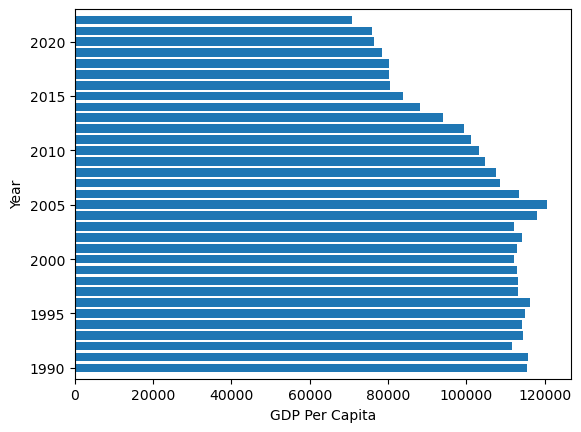

In [51]:
plt.barh(width=Lux.GDP_Per_Capita, y=Lux.Year.sort_values())
plt.ylim(1989,2023)
plt.xlabel('GDP Per Capita')
plt.ylabel('Year')

<Axes: xlabel='Year'>

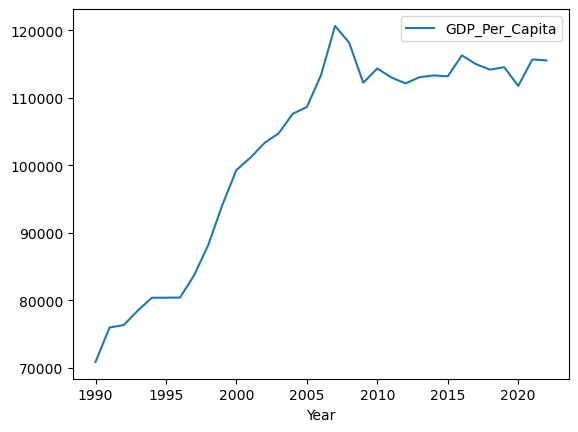

In [52]:
Lux.plot(x='Year', y='GDP_Per_Capita', kind='line')

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [54]:
bottom_gdp_2020 = filtered_gdp['GDP_Per_Capita'].min()
BG2_Country = filtered_gdp[filtered_gdp['GDP_Per_Capita']==bottom_gdp_2020]
BG2_Country

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [55]:
Bur = gdp_df[gdp_df['Country']=='Burundi']
Bur

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


Text(0, 0.5, 'Year')

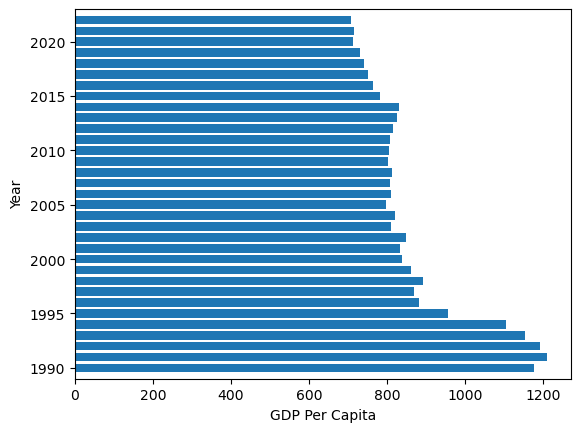

In [56]:
plt.barh(width=Bur.GDP_Per_Capita, y=Bur.Year)
plt.ylim(1989,2023)
plt.xlabel('GDP Per Capita')
plt.ylabel('Year')

### 14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

#### Shoutout to Ryan Henderson for the nrows tip

In [59]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)

In [60]:
print(internet_df['Country or Area'].dtypes)
print(internet_df['Year'].dtypes)
print(internet_df['Value'].dtypes)

object
int64
float64


In [61]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


### 15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [63]:
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [64]:
internet_df = internet_df.drop('Value Footnotes', axis=1)

### 16. Look at the number of observations in this dataset per year. What do you notice?

In [66]:
obv_per_year = internet_df.groupby('Year')['Country'].count().sort_index()

In [67]:
obv_per_year

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64

In [68]:
#2023 seems to be very light, perhaps the cut off was early in the year; also the numbers for 1991-1994 seem to be very low as well

### 17. What is the first year to have a non-zero internet users percentage value?

In [70]:
nziu = internet_df[internet_df['Internet_Users_Pct']>0]

In [71]:
nziu.sort_values(['Year', 'Internet_Users_Pct'])

,Country,Year,Internet_Users_Pct
543,Belgium,1990,0.001007
5150,Spain,1990,0.012874
2829,Italy,1990,0.017545
2892,Japan,1990,0.020294
3054,Korea (Republic of),1990,0.023265
...,...,...,...
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
1537,Denmark,2023,98.775600
3323,Luxembourg,2023,99.347900


In [72]:
#It looks like 1990 was the first year to have a non-zero internet users percentage value.

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [74]:
internet_df.groupby('Year').avg()

AttributeError: 'DataFrameGroupBy' object has no attribute 'avg'

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
less_than_5 = internet_df[internet_df['Internet_Users_Pct']<5]

In [ ]:
lt5_2014 = less_than_5[less_than_5['Year']==2014]

In [ ]:
lt5_2014

In [ ]:
lt5_2014['Country'].nunique()

### 20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [ ]:
gdp_df.dtypes

In [ ]:
internet_df.dtypes

#### Shoutout to Charlie Napier for the help on this next part

In [ ]:
gdp_and_int_df = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='outer')

In [ ]:
gdp_and_int_df

### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
gid_2014 = gdp_and_int_df[gdp_and_int_df['Year']==2014]

In [ ]:
top3_gid_2014 = gid_2014.sort_values('Internet_Users_Pct', ascending=False).head(3)

In [ ]:
top3_gid_2014

In [ ]:
sns.FacetGrid(gid_2014)

### 22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

### 23.Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

### 24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

### 25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

### Bonus: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.